## Detectando um tabuleiro de xadrez

Objetivos:
* Fazer um algoritmo que detecta um tabuleiro de xadrez e suas casas
* Mostrar o perímetro do tabuleiro
* Ter uma opção de mudar a cor de uma casa quando selecionada

### Índice

#### 1) Imagem
#### 2) Canny Edge Detection
1) Filtragem de ruídos
2) Encontrando gradiente de intensidade da imagem
3) Non-Maximum Surpression
4) Difinindo uma limite maior e menor
#### 3) Hough Line Tranform
#### 4) Calculando Interseções
1) Convertendo equação polar para cartesiana
2) Encontrando a interseção entre duas retas
3) Calculando todos os pontos
4) Cortando a imagem nos limites do tabuleiro
#### 5) Identificando Cada Casa Do Tabuleiro
1) 81 primeiros pontos
2) Dicionário com as casas
3) Identificando casas

In [1]:
# Importações

import cv2 as cv
import matplotlib.pyplot as plt
import math 
import numpy as np
from typing import List, Tuple, Dict
from collections import Counter

In [276]:
# Tabuleiro

img_original = cv.imread('img6.jpg')

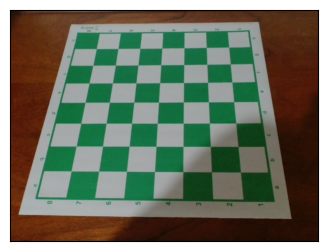

In [277]:
# Exibindo tabuleiro

img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
img_pts = img_original
img_limites = img_original

plt.figure(figsize=(4,3))
plt.imshow(img_original)
plt.xticks([]); plt.yticks([])
plt.show()

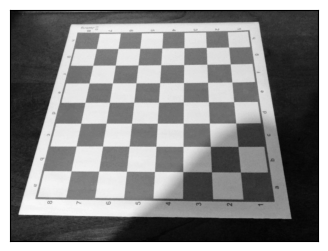

In [4]:
# Convertendo a imagem para cinza a fim de reduzir o processamento

img = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(4,3))
plt.imshow(img, cmap='gray')
plt.xticks([]); plt.yticks([])
plt.show()

## Canny Edge Detection

Este é um método de detecção de bordas criado por John Canny em 1986. Ele funciona baseado em 4 tecnicas que ocorrem em sequência a fim de detectar bordas em uma imagem. 

#### 1) Filtragem de ruidos 

Primeiro é aplicado um filtro gaussiano na imagem que vai sua retirar pequenos ruidos e preservar as bordas. 

O que esse filtro faz é multiplicar o pixel e os pixels ao redor por uma matriz com uma distribuição gaussiana (normal) e substituir o pixel pela média dos valores resultantes da multiplicação das matrizes.

Exemplo de matriz com distribuição gaussiana:

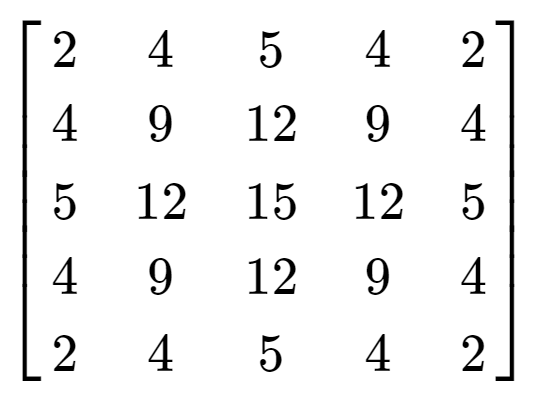

Exemplo de imagem com o filtro aplicado

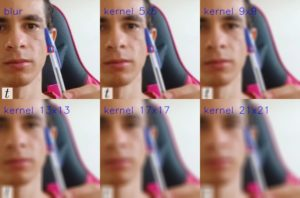

#### 2) Encontrar o gradiente de intensidade da imagem

Para isso é usado um procedimento análogo ao Sobel que calcula a intensidade da variação de claro para escuro (O quão forte é essa variação) e também direção dessa variação. Assim é possível estimar uma transição claro-escuro e sua direção. Como essas variações correspondem a fronteiras em objetos, é possível definir contornos.

Isso é feito por meio de multiplicações entre cada pixel da imagem e duas matrizes: Gx e Gy. A Gx calcula o gradientes horizontais e a Gy calcula os gradientes verticais.

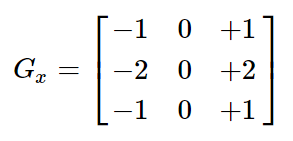 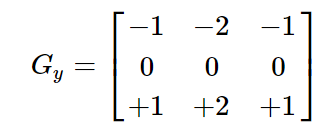

Então é usado a seguinte fórmula para calcular o gradiente de intensidade x e y (G) e sua direção (θ).

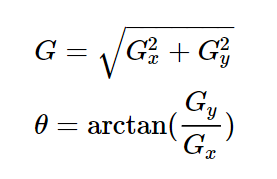

Por fim a direção é arredondada para um dos seguintes ângulos: 0, 45, 90, 135

#### 3) Non-maximum suppression

Essa técnica remove os pixels que não fazem parte de uma borda, assim as bordas serão do tamanho de um pixel. Ela compara os pixels que estão lado a lado e que tem a mesma direção da borda para saber qual pixel melhor define a borda.

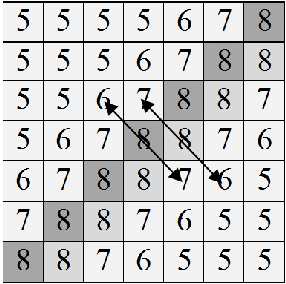

### 4) Definir um limite maior e um menor. 

O que acontece é o seguinte, se um pixel é maior que o limite maior, então esse pixel é uma borda. Se um pixel está no meio dos dois limites e se conecta com um pixel que está acima do limite maior, então esse pixel também é uma borda. Agora, se o pixel está abaixo do limite menor, ou entre o limite maior e menor e não se conecta com outro pixel acima do limite maior, então ele não é considerado uma borda. As recomendações do Canny é que os ratios dos limites fique entre 2:1 e 3:1.

No exemplo abaixo apenas a linha A e a linha BC são consideradas bordas

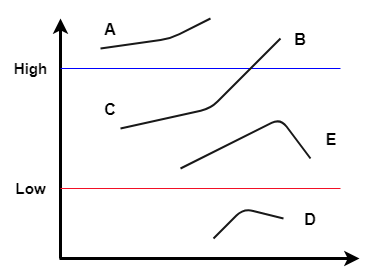

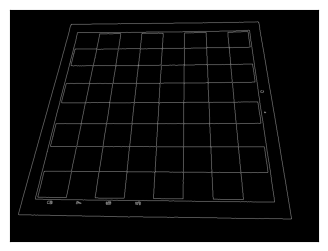

In [5]:
# Detectando as bordas da imagem com a função Canny

bordas = cv.Canny(img, 130, 300) # fiquei testando vários parâmetros até encontrar um bom 
plt.figure(figsize=(4,3))
plt.imshow(bordas, cmap='gray')
plt.xticks([]); plt.yticks([])
plt.show()

## Hough Line Transform

Geralmente ume reta é representada pela seguinte fórmula y = ax + b; mas ela também pode ser representada pela equação polar r = xcos(θ) + ysen(θ) que é mais conveniente para encontrar linhas em uma imagem. Na fórmula polar r é a distância que uma reta a 90° com a reta faz com o centro do plano e θ é o ângulo dessa de reta r com as abscissas. Portanto, qualquer reta pode ser representada com esses dois termos (r, θ)

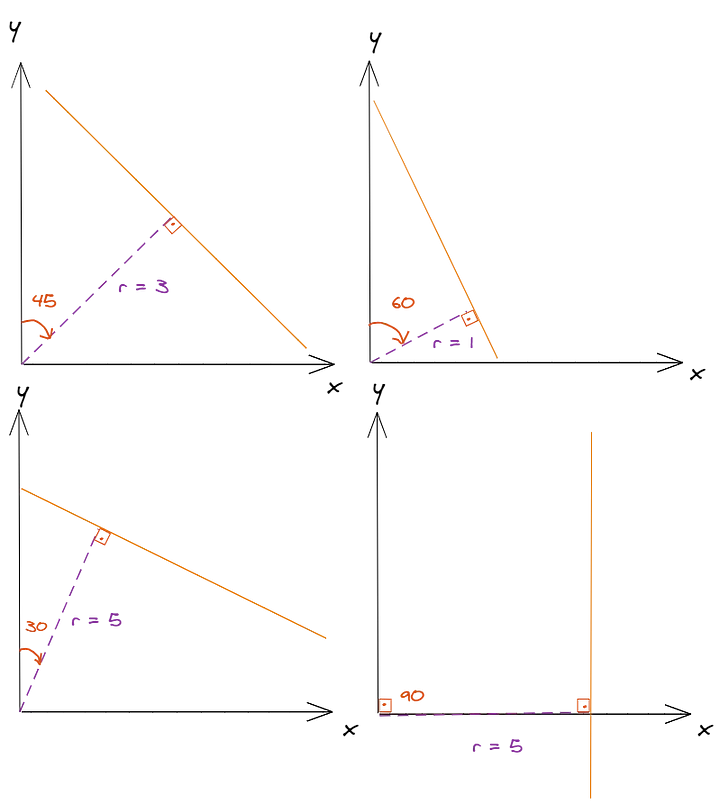

Para começar, o método HoughLines cria um array do numpy (matriz) com vários zeros para somar os r e θ (r = linhas, θ = colunas). O tamanho da matriz é diretamente ralacionado com a precisão desse método, sendo que uma matriz maior pode guardar mais possibilidades de retas. Então ele substitui os θ por números de 0 a 180, que são as possibilidades de angulos, e encontra todos os pares r e θ (no caso retas) que um determinado ponto pode ter e guarda esses valores na matriz que acumula as retas.

Por fim, é passado um threshold (limite) para o método que nada mais é do que o número de pontos mínimos que uma reta tem que ter para ser considerada. Assim, todas as retas que tiveram mais "votos" do que o limite na matriz serão retornadas pelo método. 

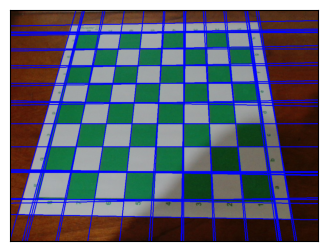

In [6]:
# Fazendo uma transformada de linhas Hough
nova_img = img_original
linhas = cv.HoughLines(bordas,rho=1,theta=np.pi/180,threshold=120) 
# rho = distância em pixels; theta = angulo em radianos
# ainda preciso testar qual o threshold mais apropriado para detectar as linhas do tabuleiro

for linha in linhas: # forma de desenhar linhas sugerida pela documentação da função
    rho,theta = linha[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv.line(nova_img,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(figsize=(4,3))
plt.imshow(nova_img)
plt.xticks([]); plt.yticks([])
plt.show()

In [7]:
# Exibindo linhas
print(len(linhas))
for line in linhas:
    print(line[0])

# linhas = [[[1,1]], [[2,2]]]

47
[354.          1.5707964]
[637.          1.5882496]
[426.          1.5707964]
[4.1500000e+02 1.0471976e-01]
[3.5200000e+02 1.5707964e-01]
[288.          1.5707964]
[128.         1.553343]
[50.        1.553343]
[228.          1.5707964]
[76.        1.553343]
[219.          0.2443461]
[70.         1.5707964]
[181.         1.553343]
[587.          1.5882496]
[173.          1.5707964]
[506.          1.5707964]
[-725.           3.0019662]
[503.          1.5707964]
[4.780000e+02 5.235988e-02]
[-670.          3.054326]
[237.         1.553343]
[-755.           2.9670596]
[2.9000000e+02 2.0943952e-01]
[197.           0.27925268]
[-609.          3.106686]
[121.          1.5707964]
[541.   0.]
[225.          0.2443461]
[-731.           3.0019662]
[-764.          2.984513]
[68.         1.5707964]
[-602.           3.0892327]
[5.4800000e+02 1.7453292e-02]
[590.          1.5707964]
[602.         1.553343]
[2.8500000e+02 1.9198622e-01]
[223.          0.2617994]
[80.        1.553343]
[4.820000e+02 6

Eu estava com problemas para calcular apenas uma linha que representasse a borda do tabuleiro, em algumas imagens funcionava e em outras não (algumas bordas ficavam com mais de uma linha e outras nenhuma). Então eu resolvi abaixar o threshold do HoughLines e calcular várias linhas. Agora vou calcular a média das linhas que estão próximas para que fique apenas uma linha representando a borda do tabuleiro. 

* Função para agrupar as linhas

    * Criar uma lista de grupos de linhas
    * Pegar a primeira linha das linhas e comparar com as linhas dos grupos de linhas
    * Se a o r_linha - r_cada_linha_grupo e theta_linha - theta_cada_linha_grupo for menor que um certo limite, a linha é adicionada no grupo
    * Se não, a é criado um novo grupo para aquela linha
    * Fazer isso com todas as linhas
    * No final teremos uma lista com vários grupos de linhas onde as linhas com r e theta estarão nos mesmos grupos

* Função para definir a linha média 
    * Criar uma nova lista em que se um grupo tem apenas uma linha ela é automaticamente adicionada na lista e se há mais de uma linha no grupo, então é calculado o r e theta médio de cada linha do grupo

In [8]:
def agrupar_linhas_parecidas(linhas: List[List[List[float]]], r_limite: int,
                              theta_limite: float) -> List[List[Tuple[np.float32]]]:
    """Essa função recebe uma lista de linhas do HoughLines e agrupa
    todas as linhas que estiverem próximas. Essa proximidade é calculada
    através de dois parâmetros: r_limite e theta_limite."""

    grupos = []

    for linha in linhas:
        r_linha, theta_linha = linha[0]
        linha_adicionada = False
        for grupo in grupos:
            for r_grupo, theta_grupo in grupo:
                if abs(r_linha - r_grupo) <= r_limite and abs(theta_linha - theta_grupo) <= theta_limite:
                    grupo.append((r_linha, theta_linha))
                    linha_adicionada = True
                    break
            if linha_adicionada:
                break

        if linha_adicionada == False:
            grupos.append([(r_linha, theta_linha)])
    
    return grupos

resultado = agrupar_linhas_parecidas(linhas, 14, np.pi/36)
print(resultado)

[[(np.float32(354.0), np.float32(1.5707964))], [(np.float32(637.0), np.float32(1.5882496))], [(np.float32(426.0), np.float32(1.5707964))], [(np.float32(415.0), np.float32(0.10471976))], [(np.float32(352.0), np.float32(0.15707964))], [(np.float32(288.0), np.float32(1.5707964)), (np.float32(297.0), np.float32(1.553343)), (np.float32(283.0), np.float32(1.5882496))], [(np.float32(128.0), np.float32(1.553343)), (np.float32(121.0), np.float32(1.5707964))], [(np.float32(50.0), np.float32(1.553343))], [(np.float32(228.0), np.float32(1.5707964)), (np.float32(237.0), np.float32(1.553343))], [(np.float32(76.0), np.float32(1.553343)), (np.float32(70.0), np.float32(1.5707964)), (np.float32(68.0), np.float32(1.5707964)), (np.float32(80.0), np.float32(1.553343))], [(np.float32(219.0), np.float32(0.2443461)), (np.float32(225.0), np.float32(0.2443461)), (np.float32(223.0), np.float32(0.2617994))], [(np.float32(181.0), np.float32(1.553343)), (np.float32(173.0), np.float32(1.5707964))], [(np.float32(587.

In [9]:
def linha_media(lista: List[List[Tuple]]) -> List[Tuple]:
    """Essa função recebes as linhas da função
    agrupar_linhas_parecidas e retorna uma lista
    com a linha média de cada grupo"""
    lista_linhas_medias = []
    for l in lista:
        rs = [i[0] for i in l]
        thetas = [t[1] for t in l]
        r = sum(rs) / len(rs)
        theta = sum(thetas) / len(thetas)
        lista_linhas_medias.append(([r, theta]))

    return lista_linhas_medias

linhas = linha_media(resultado)
print(linhas)
print(len(linhas))

[[np.float32(354.0), np.float32(1.5707964)], [np.float32(637.0), np.float32(1.5882496)], [np.float32(426.0), np.float32(1.5707964)], [np.float32(415.0), np.float32(0.10471976)], [np.float32(352.0), np.float32(0.15707964)], [np.float32(289.33334), np.float32(1.5707964)], [np.float32(124.5), np.float32(1.5620697)], [np.float32(50.0), np.float32(1.553343)], [np.float32(232.5), np.float32(1.5620697)], [np.float32(73.5), np.float32(1.5620697)], [np.float32(222.33333), np.float32(0.25016388)], [np.float32(177.0), np.float32(1.5620697)], [np.float32(593.0), np.float32(1.5707964)], [np.float32(501.25), np.float32(1.579523)], [np.float32(-728.0), np.float32(2.997603)], [np.float32(480.0), np.float32(0.061086524)], [np.float32(-666.5), np.float32(3.0455995)], [np.float32(-759.5), np.float32(2.9757862)], [np.float32(287.5), np.float32(0.20071286)], [np.float32(197.0), np.float32(0.27925268)], [np.float32(-605.5), np.float32(3.0979595)], [np.float32(545.0), np.float32(0.011635528)]]
22


## Calculando as interseções:

* Converter linha polar para forma cartesiana
* Calcular interseção de duas linhas na forma cartesiana (sistema linear)
* Calcular interseção para todas as possibilidades de linhas

A equação polar de uma reta é dada por r = xcos(θ) + ysen(θ) em que r é distância perpendicular do (0,0) até a reta e θ é o angulo de inclinaçao com o eixo x em radianos.

Forma cartesiana é ax + by + c = 0

rearranjando = xcos(θ) + ysen(θ) -r = 0 (no caso a = cos(θ), b = sen(θ), c = -r)

#### 1) Convertendo equação polar para cartesiana

In [10]:
# x = rho * cos(theta)
# y = rho * sin(theta)
# 0 = ax + by + c

def polarparacartesiana(rho, theta):
    """Essa função recebe os parâmetros de uma equação polar
    e transforma em parâmetros de uma equação cartesiana."""

    a = math.cos(theta)
    b = math.sin(theta)
    c = -rho

    return a, b, c

#### 2) Encontrando a interseção entre duas retas:

Para isso deve-se resorver o sistema de equações:

ax + by + c = 0

dx + ey + f = 0

O resultado dos valores de x e y serão as coordenadas onde as retas se encontram

Resolvendo o sistema com a regra de Cramer

* se o determinante der zero, então não há interseção

P(x,y) = interseção

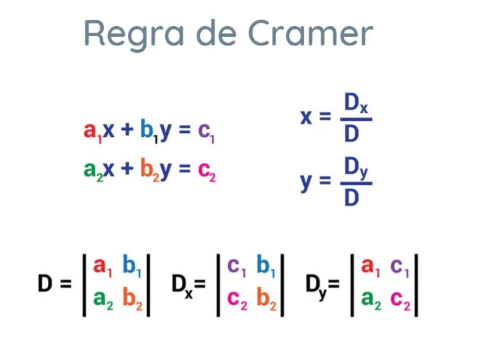

In [11]:
def intersecoes(reta1, reta2):
    """Essa função recebe duas retas e verifica
    se há uma interseção entre elas, se existir
    ela retorna essa interseção."""
    
    rho1, theta1 = reta1
    rho2, theta2 = reta2

    a1, b1, c1 = polarparacartesiana(rho1, theta1)
    a2, b2, c2 = polarparacartesiana(rho2, theta2)

    determinante = (a1 * b2) - (b1 * a2)
    if determinante == 0:
        return None
    
    dx = (-c1 * b2) - (-c2 * b1)
    dy = (-c2 * a1) - (-c1 * a2)
    x = int(dx / determinante)
    y = int(dy / determinante)
    
    return x, y

#### 3) Calculando todos os pontos

In [12]:
def todosospontos(linhas):
    """Essa função recebe uma lista de linhas e 
    retorna os pontos de  interseções entre elas."""

    pontos = []
    assert linhas is not None

    linhas = [linha for linha in linhas]
    for i in range(len(linhas)):
        for j in range(i + 1, len(linhas)):
            ponto = intersecoes(linhas[i], linhas[j])
            if ponto: pontos.append(ponto)

    return pontos

In [13]:
pts = todosospontos(linhas)

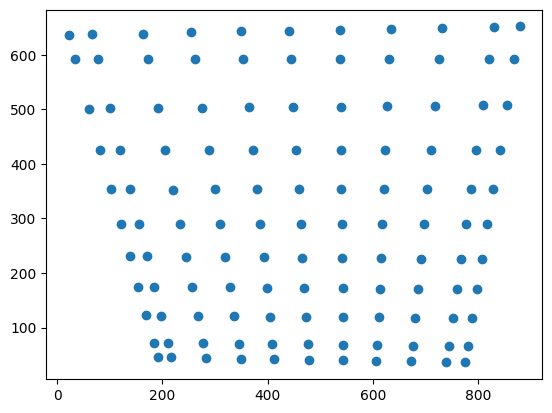

In [ ]:
pts = [i for i in pts if (i[0] > 0) and (i[1] > 0) and (i[0] < 1000) and (i[1] < 1000)]
xs = [x[0] for x in pts]
ys = [x[1] for x in pts]
plt.scatter(xs, ys)


#### 4) Cortando a imagem nos limites do tabuleiro

* Organizar todos os pontos do menor y para o maior y
* Pegar os 11 menores e organizar do menor x para o maior x
* Pegar o primeiro e o último
* Pegar os 11 maiores e organizar do menorx para o maior x
* Pegar o primeiro e o último

In [24]:
# Organizando os pontos

pts = sorted(pts, key= lambda y: y[1])

# a função interseções calculou algumas interseções fora da imagem/negativas, 
# então primeiro vamos tirar os pontos negativos ou fora da imagem:
pts = [i for i in pts if (i[0] > 0) and (i[1] > 0) and (i[0] < 1000) and (i[1] < 1000)]

pts_11menores = pts[:11]
pts_11menores = sorted(pts_11menores, key= lambda x: x[0])

pts_11maiores = pts[-11:]
pts_11maiores = sorted(pts_11maiores, key= lambda x: x[0])

# Pontos
pt1 = pts_11menores[0]
pt2 = pts_11menores[-1]
pt3 = pts_11maiores[0]
pt4 = pts_11maiores[-1]

In [16]:
print(pts)

[(776, 36), (740, 37), (673, 38), (607, 39), (544, 40), (478, 41), (412, 42), (349, 43), (284, 45), (217, 46), (191, 46), (745, 66), (781, 66), (676, 67), (609, 68), (544, 68), (409, 69), (476, 69), (345, 70), (211, 71), (278, 71), (184, 71), (752, 117), (789, 117), (680, 118), (611, 119), (543, 119), (404, 120), (473, 120), (337, 121), (198, 122), (268, 122), (169, 123), (760, 170), (798, 170), (686, 171), (613, 171), (470, 172), (543, 172), (399, 173), (328, 174), (257, 174), (184, 175), (154, 175), (768, 225), (807, 225), (691, 226), (615, 227), (542, 227), (466, 228), (393, 229), (320, 229), (246, 230), (170, 231), (138, 231), (386, 289), (310, 289), (155, 289), (777, 289), (463, 289), (697, 289), (818, 289), (234, 289), (121, 289), (618, 289), (541, 289), (221, 353), (380, 354), (300, 354), (139, 354), (786, 354), (459, 354), (703, 354), (829, 354), (103, 354), (621, 354), (540, 354), (206, 425), (372, 426), (288, 426), (120, 426), (797, 426), (454, 426), (710, 426), (841, 426), (

In [25]:
print(pt1, pt2, pt3, pt4)

(191, 46) (776, 36) (22, 637) (879, 652)


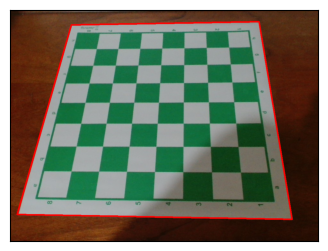

In [278]:
# Desenhando linhas nos limites do tabuleiro

cv.line(img_original, pt1, pt2, color=(255, 0, 0), thickness=3)
cv.line(img_original, pt2, pt4, color=(255, 0, 0), thickness=3)
cv.line(img_original, pt4, pt3, color=(255, 0, 0), thickness=3)
cv.line(img_original, pt3, pt1, color=(255, 0, 0), thickness=3)

plt.figure(figsize=(4,3))
plt.imshow(img_original, cmap='gray')
plt.xticks([]); plt.yticks([])
plt.show()

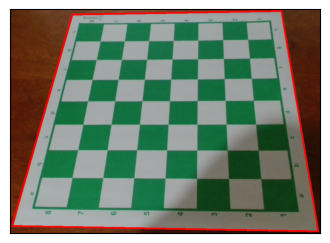

In [50]:
# Função para cortar a imagem

img_cortada = img_limites[pt2[1]-5:pt4[1]+5, pt3[0]-5:pt4[0]+5]

plt.figure(figsize=(4,3))
plt.imshow(img_cortada)
plt.xticks([]); plt.yticks([])
plt.show()

### Identificando cada casa do tabuleiro

Se tirarmos:
* os 11 pontos com menor x
* os 11 pontos com maior x
* os 9 pontos com menor y
* os 9 pontos com menor y

Então sobrará apenas o tabuleiro com os pontos sendo os vértices casas

Depois, podemos identificar cada casa da seguinte maneira:

- casa a8 = [(x1, y1), (x1, y12), (x12, y1), (x12, y12)]
- casa b8 = ...

Assim identificaremos todas as casas do tabuleiro.

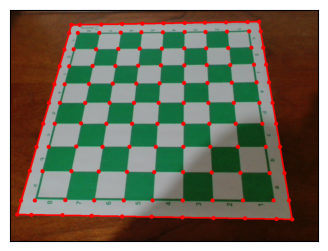

In [51]:
# Mostrando pontos

for pt in pts:
    cv.circle(img_pts, pt, radius=3, color=(255,0,0), thickness=5)

plt.figure(figsize=(4,3))
plt.imshow(img_pts)
plt.xticks([]); plt.yticks([])
plt.show()

In [78]:
# Função para pegar os 81 pontos que definem o tabuleiro

def pontos81(lista: List[Tuple[int, int]]) -> List[Tuple[int, int]]:
    """
    Essa função recebe os pontos os tabuleiro e remove os pontos que 
    são referentes a borda do tabuleiro, deixando somente os pontos
    que definem as casas do tabuleiro.

    1) Ordenar os pts do menor y para o maior y
    2) Descartar os 11 menores y e os 11 maiores
    3) Pegar os 11 maiores y e ordnar eles pelo x
    4) Pegar os 11 maiores já ordenados e descartar o menor e o maior
    5) Colocar esses 9 pts que sobraram em um dicionário com o menor sendo 1 e o maior sendo 9
    6) Descartar esses pts e fazer tudo de novo a partir do passo 3
    """
    vertices_tabuleiro = []

    lista_y = sorted(lista, key= lambda y: y[1])
    lista_y = lista_y[11:-11]

    for i in range(9):
        _11maiores = lista_y[-11:]
        _11maiores = sorted(_11maiores, key= lambda x: x[0])
        _9maiores = _11maiores[1:-1]
        for i in _9maiores:
            vertices_tabuleiro.append(i)

        lista_y = lista_y[:-11]

    assert len(vertices_tabuleiro) == 81

    return vertices_tabuleiro

In [228]:
# Dicionário com as casas

Casa = str
Coordenadas = Tuple[int, int]

casas: Dict[Casa, Coordenadas] = {}

nome_casas = [f"{l}{n}" for l in
               ['a','b','c','d','e','f','g', 'h']
               for n in sorted(range(1, 9), reverse=True)]

assert len(nome_casas) == 64

In [253]:
# Função para identificar todos as casas do tabuleiro e adicione as coordenadas no dict

def casas_tabuleiro(v: List[Tuple[int, int]]):
    """
    Essa função recebe um dicionário com os 
    vértices do tabuleiro e adiciona o nome da casa
    e suas respectivas coordenadas no dicionário 'casas'. 

    1) Definir cada casa seguindo a seguinte lógica: os pts 1 e 2 + os pts 10 e 11 são
    os limites da casa a1, os pts 3 e 4 + os pts 12 e 13 são os limites da casa b1...
    2) Adicionar as coordendas no dicionário
    """

    coluna_a = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(8)]
    coluna_b = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(9,17)]
    coluna_c = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(18,26)]
    coluna_d = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(27,35)]
    coluna_e = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(36,44)]
    coluna_f = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(45,53)]
    coluna_g = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(54,62)]
    coluna_h = [[v[i], v[i+1], v[i+9], v[i+10]] for i in range(63,71)]

    colunas = []
    colunas.extend(coluna_a)
    colunas.extend(coluna_b)
    colunas.extend(coluna_c)
    colunas.extend(coluna_d)
    colunas.extend(coluna_e)
    colunas.extend(coluna_f)
    colunas.extend(coluna_g)
    colunas.extend(coluna_h)

    for i in range(64):
        casas[nome_casas[i]] = colunas[i]

In [290]:
# Mudar a cor de uma casa do tabuleiro quando ela for selecionada

def identificar_casa(img: np.ndarray, coord: List[Tuple[int, int]]) -> np.ndarray:
    """
    Essa função recebe uma imagem e uma lista com
    quatro coordenadas e muda a cor dos pixels
    dentro dessas quatro coordenadas para 
    vemelho. Depois ela retorna essa imagem

    Usaremos a função fillPoly do opencv
    """
    img_copia = img

    # Correção para a função preencher a casa por completo 
    a,b,c,d = coord
    pontos = [a,b,c,d]
    pontos = np.array(pontos)
    cv.fillPoly(img_copia, pts=[pontos], color=(100, 100, 255))

    pontos = [a,c,b,d]
    pontos = np.array(pontos)
    cv.fillPoly(img_copia, pts=[pontos], color=(100, 100, 255))


    return img_copia

In [217]:
# Detectando cada casa do tabuleiro

pontos = pontos81(pts)
print(pontos)

[(77, 593), (172, 592), (262, 593), (354, 593), (444, 593), (538, 593), (631, 593), (726, 593), (821, 593), (101, 502), (191, 502), (276, 503), (364, 504), (449, 505), (539, 505), (628, 506), (718, 507), (809, 508), (120, 426), (206, 425), (288, 426), (372, 426), (454, 426), (540, 426), (624, 426), (710, 426), (797, 426), (139, 354), (221, 353), (300, 354), (380, 354), (459, 354), (540, 354), (621, 354), (703, 354), (786, 354), (155, 289), (234, 289), (310, 289), (386, 289), (463, 289), (541, 289), (618, 289), (697, 289), (777, 289), (170, 231), (246, 230), (320, 229), (393, 229), (466, 228), (542, 227), (615, 227), (691, 226), (768, 225), (184, 175), (257, 174), (328, 174), (399, 173), (470, 172), (543, 172), (613, 171), (686, 171), (760, 170), (198, 122), (268, 122), (337, 121), (404, 120), (473, 120), (543, 119), (611, 119), (680, 118), (752, 117), (211, 71), (278, 71), (345, 70), (409, 69), (476, 69), (544, 68), (609, 68), (676, 67), (745, 66)]


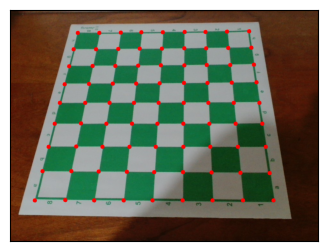

In [218]:
img_pontos81 = img_original
for pt in pontos:
    cv.circle(img_pontos81, pt, radius=3, color=(255,0,0), thickness=5)

plt.figure(figsize=(4,3))
plt.imshow(img_pontos81)
plt.xticks([]); plt.yticks([])
plt.show()

In [254]:
casas_tabuleiro(pontos)

In [255]:
print(casas)

{'a8': [(77, 593), (172, 592), (101, 502), (191, 502)], 'a7': [(172, 592), (262, 593), (191, 502), (276, 503)], 'a6': [(262, 593), (354, 593), (276, 503), (364, 504)], 'a5': [(354, 593), (444, 593), (364, 504), (449, 505)], 'a4': [(444, 593), (538, 593), (449, 505), (539, 505)], 'a3': [(538, 593), (631, 593), (539, 505), (628, 506)], 'a2': [(631, 593), (726, 593), (628, 506), (718, 507)], 'a1': [(726, 593), (821, 593), (718, 507), (809, 508)], 'b8': [(101, 502), (191, 502), (120, 426), (206, 425)], 'b7': [(191, 502), (276, 503), (206, 425), (288, 426)], 'b6': [(276, 503), (364, 504), (288, 426), (372, 426)], 'b5': [(364, 504), (449, 505), (372, 426), (454, 426)], 'b4': [(449, 505), (539, 505), (454, 426), (540, 426)], 'b3': [(539, 505), (628, 506), (540, 426), (624, 426)], 'b2': [(628, 506), (718, 507), (624, 426), (710, 426)], 'b1': [(718, 507), (809, 508), (710, 426), (797, 426)], 'c8': [(120, 426), (206, 425), (139, 354), (221, 353)], 'c7': [(206, 425), (288, 426), (221, 353), (300,

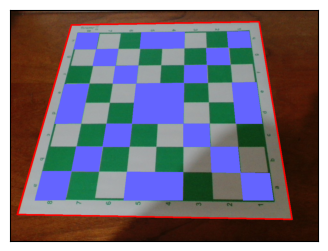

In [315]:
img_casa_e4 = img_original
img_casa_e4 = identificar_casa(img_casa_e4, casas['d8'])

plt.figure(figsize=(4,3))
plt.imshow(img_casa_e4)
plt.xticks([]); plt.yticks([])
plt.show()